## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
remote_folder = '9_5_18_Gel_Interface_Vids' #Folder in AWS S3 containing files to be analyzed
bucket = 'mckenna.data'
vids = 3
visc = {'0_4': 0.4, '1_2': 1.2}

counter = 0
for key in visc:
    for num in range(1, vids+1):
        
        filename = 'features_100x_0_4_1_2_gel_{}_bulk_vid_{}.csv'.format(key, num)
        aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
        fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
        fstats['Percent Agarose'] = pd.Series(fstats.shape[0]*[str(visc[key])], index=fstats.index)
        fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
        #print(num)
        print(filename)
        counter = counter + 1
        if counter == 1:
            fstats_tot = fstats
        else:
            fstats_tot = fstats_tot.append(fstats, ignore_index=True)

features_100x_0_4_1_2_gel_0_4_bulk_vid_1.csv
features_100x_0_4_1_2_gel_0_4_bulk_vid_2.csv
features_100x_0_4_1_2_gel_0_4_bulk_vid_3.csv
features_100x_0_4_1_2_gel_1_2_bulk_vid_1.csv
features_100x_0_4_1_2_gel_1_2_bulk_vid_2.csv
features_100x_0_4_1_2_gel_1_2_bulk_vid_3.csv


In [19]:
fstats_tot.to_csv('features.csv')

In [4]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = ['Percent Agarose', 'Video Number', 'Track_ID']
fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

In [21]:
fstats_tot[fstats_tot['Video Number']==1]

,AR,D_fit,Deff1,Deff2,MSD_ratio,Mean_Intensity,Quality,SN_Ratio,Track_ID,X,...,boundedness,efficiency,elongation,fractal_dim,frames,kurtosis,straightness,trappedness,Percent Agarose,Video Number
0,4.984525,NaN,0.017912,NaN,0.011366,2450.523544,36.866016,1.177605,0.0,460.552209,...,0.014055,0.435903,0.799379,1.840108,94.0,50.928294,0.103314,-0.222955,0.4,1
1,3.060560,1.059430,0.268506,NaN,0.033034,2240.947379,21.509332,0.959925,1.0,238.826514,...,0.028439,0.420486,0.673262,1.972581,81.0,1.918094,0.081508,-0.218544,0.4,1
2,1.713142,9.578162,0.266444,0.115079,0.113899,2444.699059,21.444877,1.011731,2.0,447.557457,...,0.013613,0.020951,0.416277,2.429952,596.0,3.331639,0.007107,-0.223091,0.4,1
3,1.338647,1.661269,0.716886,0.195011,0.030550,2242.847390,18.131584,0.836437,3.0,29.540550,...,0.017198,0.245024,0.252977,2.111755,228.0,2.046030,0.039102,-0.221990,0.4,1
4,1.327819,0.004566,0.001835,0.000182,0.284631,3252.145174,103.238082,2.331069,4.0,47.121207,...,0.058204,0.004892,0.246886,4.233979,651.0,3.028968,0.003116,-0.209468,0.4,1
5,2.494577,0.000025,0.467413,NaN,0.003688,2256.992194,15.652640,0.760384,5.0,71.925785,...,0.041371,0.950695,0.599130,1.542674,42.0,1.708131,0.242743,-0.214593,0.4,1
6,1.035678,0.084188,0.009496,0.001115,0.750999,2106.502829,16.293638,0.781398,6.0,117.952841,...,0.080548,0.000481,0.034449,3.635035,281.0,3.329405,0.001577,-0.202700,0.4,1
7,1.558182,0.255229,0.142658,0.012721,0.096189,2359.895722,23.957788,1.045429,7.0,246.329327,...,0.054772,0.049335,0.358227,3.261737,446.0,5.813386,0.012339,-0.210511,0.4,1
8,1.231220,0.023409,0.005140,0.000468,0.611241,2996.215079,52.558846,1.858293,8.0,33.363300,...,0.058862,0.001927,0.187797,4.378716,651.0,3.007643,0.001975,-0.209269,0.4,1
9,3.231016,0.205757,0.699156,NaN,-0.008710,2253.553084,18.838731,0.853558,9.0,96.774044,...,0.019488,1.357450,0.690500,1.374317,42.0,2.290800,0.295554,-0.221287,0.4,1


## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [5]:
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=8)

Cumulative explained variance:
0 component: 0.27330958664171956
1 component: 0.40410377836276146
2 component: 0.5011529094949215
3 component: 0.5883350994478728
4 component: 0.6565862042648141
5 component: 0.7097237939023523
6 component: 0.7598668244635867
7 component: 0.8053631273263683


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [7]:
kmostat = pca.kmo(pcadataset.scaled)

0.836686881707


## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [8]:
import numpy as np
ncomp = 8
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Percent Agarose']==0.4].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Percent Agarose']==1.2].values[:, -ncomp:], axis=0)

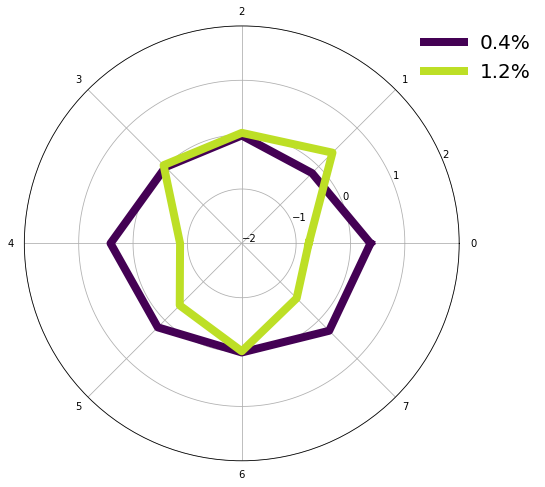

In [9]:
pca.plot_pca(dicti, savefig=True, labels=['0.4%', '1.2%'])

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [10]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7
0,alpha,elongation,X,AR,Deff2,Quality,SN_Ratio,Quality
1,Y,asymmetry2,asymmetry3,D_fit,MSD_ratio,fractal_dim,Quality,Deff2
2,asymmetry1,kurtosis,frames,Deff1,fractal_dim,Deff2,fractal_dim,fractal_dim
3,efficiency,MSD_ratio,AR,boundedness,Quality,Mean_Intensity,asymmetry3,elongation
4,boundedness,Mean_Intensity,alpha,Mean_Intensity,Mean_Intensity,asymmetry3,elongation,efficiency


In [11]:
import numpy as np
dicti = {}
dicti[0] = np.nanstd(pcadataset.final[pcadataset.final['Percent Agarose']==0.4].as_matrix(), axis=0)[-ncomp:]
dicti[1] = np.nanstd(pcadataset.final[pcadataset.final['Percent Agarose']==1.2].as_matrix(), axis=0)[-ncomp:]

/home/ubuntu/miniconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1308: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


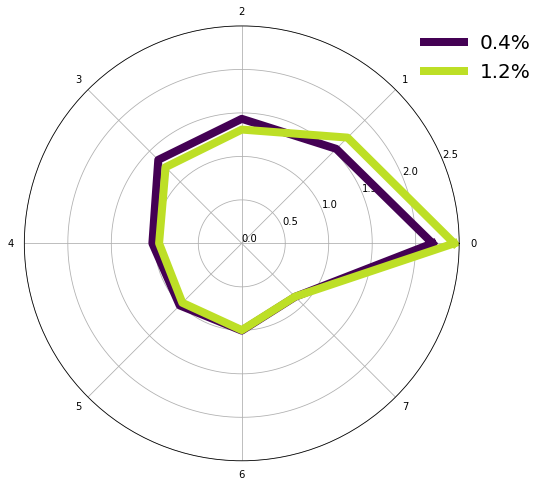

In [12]:
pca.plot_pca(dicti, savefig=True, labels=['0.4%', '1.2%'], rticks=np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5]))

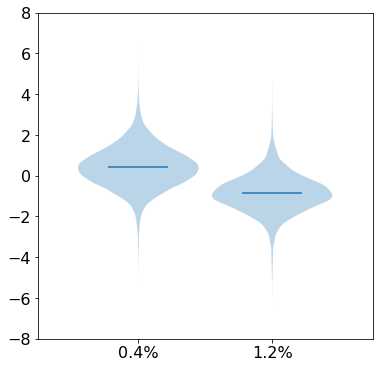

In [13]:
import diff_classifier.features as ft
tgroups = {}
tgroups[0] = pcadataset.final[pcadataset.final['Percent Agarose']==0.4]
tgroups[1] = pcadataset.final[pcadataset.final['Percent Agarose']==1.2]
ft.feature_violin(tgroups, points=160, feature=4, ylim=[-8, 8], labels=['0.4%', '1.2%'], nticks=9)

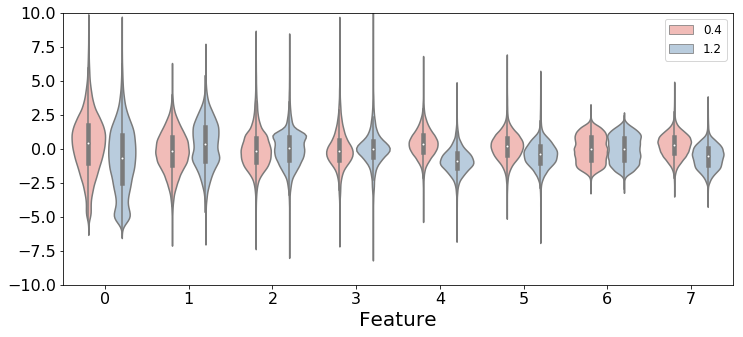

In [14]:
feats = pca.feature_violin(pcadataset.final, label='Percent Agarose', lvals=[0.4, 1.2], fsubset=8, yrange=[-10, 10])

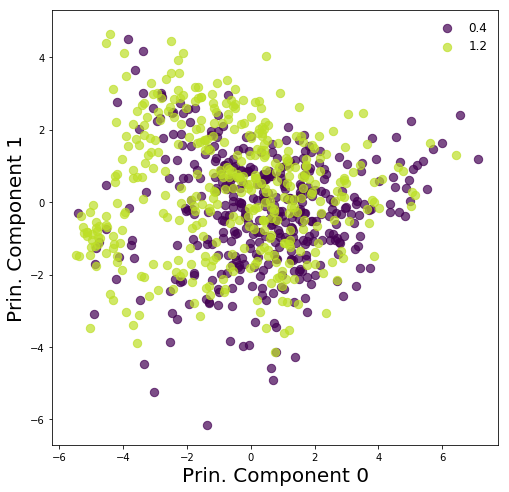

In [15]:
fstats1 = pca.feature_plot_2D(pcadataset.final, label='Percent Agarose', lvals=[0.4, 1.2], randcount=400, yrange=[-6, 6],
                              xrange=[-4, 4])

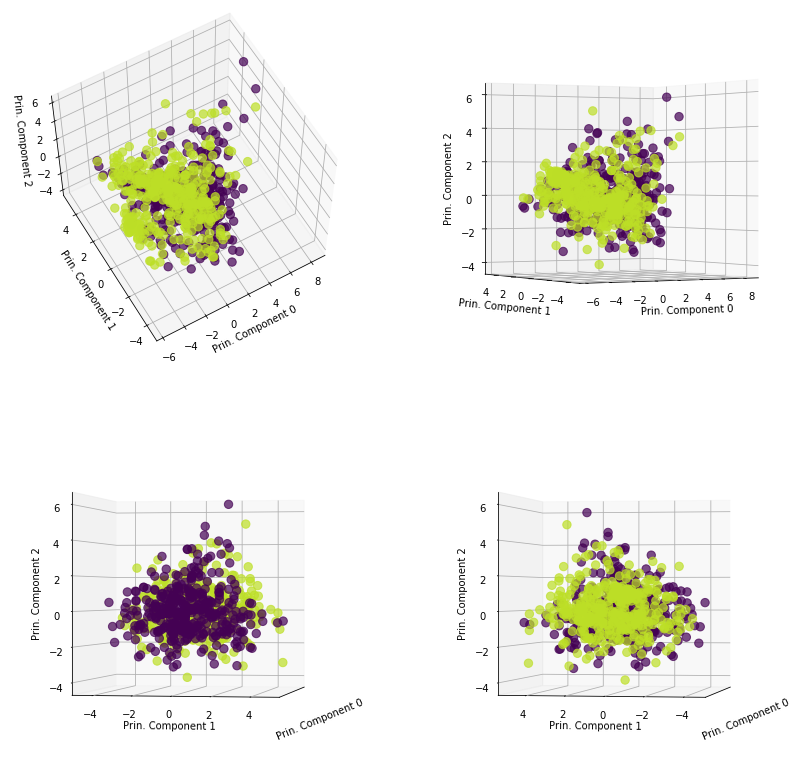

In [16]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Percent Agarose', lvals=[0.4, 1.2], randcount=400, yrange=[-6, 6],
                              xrange=[-6, 6], zrange=[-6, 6])

In [9]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])

for i in range(0, 30):
    KNNmod, X, y = pca.build_KNN_model(pcadataset.final, 'Percent Agarose', ['0.4', '1.2'], equal_sampling=True,
                                       tsize=500, n_neighbors=6, input_cols=ncomp)
    trainp = np.append(trainp, pca.predict_KNN(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Percent Agarose'].values
    testp = np.append(testp, pca.predict_KNN(KNNmod, X2, y2))

In [25]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.9223333333333332 +/ 0.008653836657164788
0.9008887927832023 +/ 0.0045698267472818474


In [6]:
vids = 6

counter = 0
for num in range(1, vids+1):

    filename = 'features_100x_0_4_1_2_gel_interface_vid_{}.csv'.format(num)
    aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
    fstats_new = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
    #fstats['Percent Agarose'] = pd.Series(fstats.shape[0]*[str(visc[key])], index=fstats.index)
    fstats_new['Video Number'] = pd.Series(fstats_new.shape[0]*[num], index=fstats_new.index)
    #print(num)
    print(filename)
    counter = counter + 1
    if counter == 1:
        fstats_tot1 = fstats_new
    else:
        fstats_tot1 = fstats_tot1.append(fstats_new, ignore_index=True)

features_100x_0_4_1_2_gel_interface_vid_1.csv
features_100x_0_4_1_2_gel_interface_vid_2.csv
features_100x_0_4_1_2_gel_interface_vid_3.csv
features_100x_0_4_1_2_gel_interface_vid_4.csv
features_100x_0_4_1_2_gel_interface_vid_5.csv
features_100x_0_4_1_2_gel_interface_vid_6.csv


In [7]:
interf_data = pca.recycle_pcamodel(pcadataset.pcamodel, fstats_tot1)

In [18]:
interf_data['Predicted'] = KNNmod.predict(interf_data[list(range(0,8))])

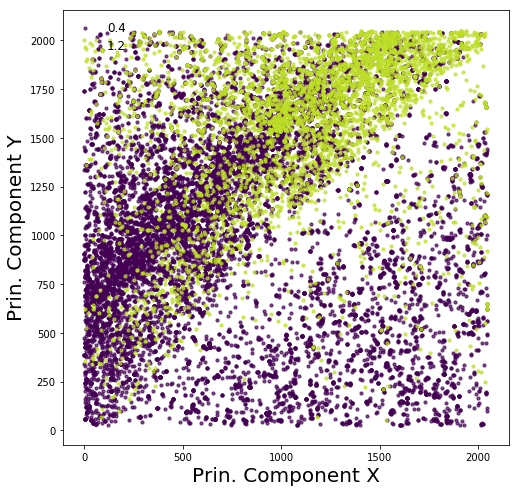

In [26]:
rearr = pca.feature_plot_2D(interf_data[interf_data['Video Number']==1],
                            label='Predicted', features=['X', 'Y'], randsel=False, dotsize=10)

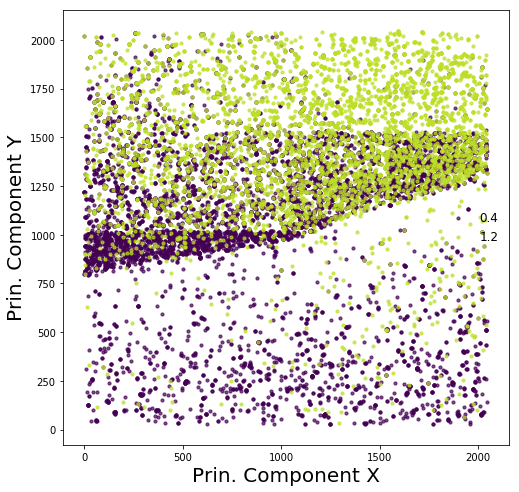

In [28]:
rearr = pca.feature_plot_2D(interf_data[interf_data['Video Number']==2],
                            label='Predicted', features=['X', 'Y'], randsel=False, dotsize=10)

In [64]:
correct = []

correct.extend(interf_data[(interf_data['Video Number']==1) & 
                           (interf_data['Y'] - 0.8384*interf_data['X'] > 1000)]['Predicted']== '1.2')
correct.extend(interf_data[(interf_data['Video Number']==2) & (interf_data['Y'] > 1510)]['Predicted'] == '1.2')
correct.extend(interf_data[(interf_data['Video Number']==3) & 
                           (interf_data['Y'] - 1.033*interf_data['X'] > 550)]['Predicted'] == '1.2')
correct.extend(interf_data[(interf_data['Video Number']==4) & (interf_data['Y'] > 1200)]['Predicted'] == '1.2')
correct.extend(interf_data[(interf_data['Video Number']==5) & (interf_data['Y'] > 1200)]['Predicted'] == '1.2')
correct.extend(interf_data[(interf_data['Video Number']==6) & (interf_data['Y'] > 1220)]['Predicted'] == '1.2')
#interf_data['Correct'] = correct
#np.mean(correct)
np.mean(correct)

0.47110879750130141

In [65]:
correct1 = []

correct1.extend(interf_data[(interf_data['Video Number']==1) & 
                           (interf_data['Y'] - 0.974*interf_data['X'] < -194)]['Predicted']== '0.4')
correct1.extend(interf_data[(interf_data['Video Number']==2) & (interf_data['Y'] < 770)]['Predicted'] == '0.4')
correct1.extend(interf_data[(interf_data['Video Number']==3) & 
                           (interf_data['Y'] - 0.975*interf_data['X'] < -146)]['Predicted'] == '0.4')
correct1.extend(interf_data[(interf_data['Video Number']==4) & (interf_data['Y'] < 770)]['Predicted'] == '0.4')
correct1.extend(interf_data[(interf_data['Video Number']==5) & (interf_data['Y'] < 770)]['Predicted'] == '0.4')
correct1.extend(interf_data[(interf_data['Video Number']==6) & (interf_data['Y'] < 900)]['Predicted'] == '0.4')
#interf_data['Correct'] = correct
#np.mean(correct)
np.mean(correct1)

0.82690922190201732

In [66]:
np.mean(correct+correct1)

0.64569155987627047

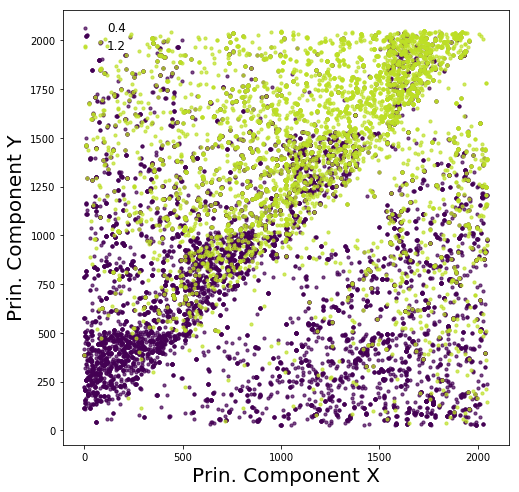

In [29]:
rearr = pca.feature_plot_2D(interf_data[interf_data['Video Number']==3],
                            label='Predicted', features=['X', 'Y'], randsel=False, dotsize=10)

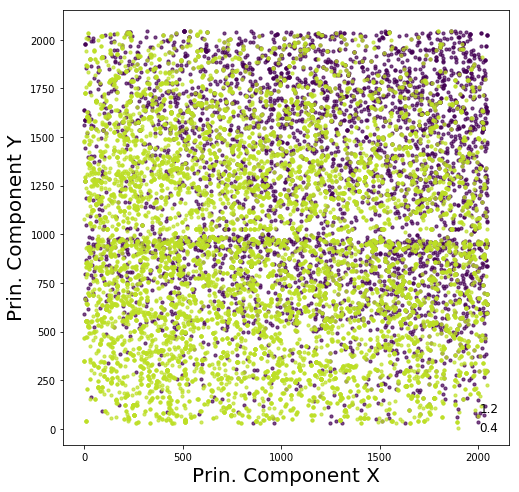

In [30]:
rearr = pca.feature_plot_2D(interf_data[interf_data['Video Number']==4],
                            label='Predicted', features=['X', 'Y'], randsel=False, dotsize=10)

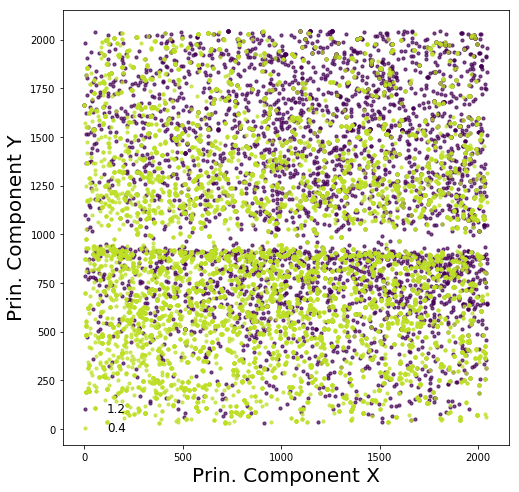

In [31]:
rearr = pca.feature_plot_2D(interf_data[interf_data['Video Number']==5],
                            label='Predicted', features=['X', 'Y'], randsel=False, dotsize=10)

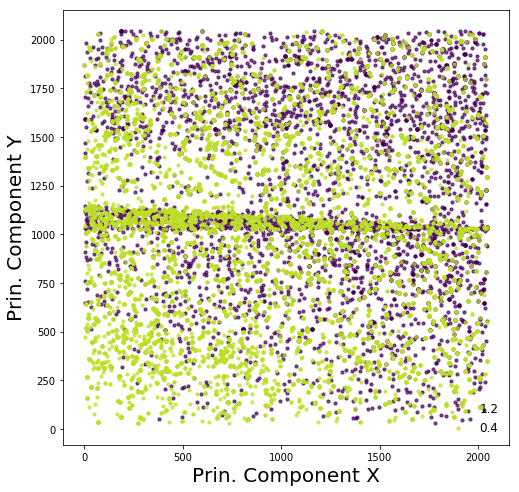

In [32]:
rearr = pca.feature_plot_2D(interf_data[interf_data['Video Number']==6],
                            label='Predicted', features=['X', 'Y'], randsel=False, dotsize=10)